In [1]:
import pandas as pd
import statistics as s
import scipy.stats as ss

In [2]:
df = pd.read_csv("salary.csv")

In [3]:
df.head()

,exp,salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [4]:
df.shape

(35, 2)

In [5]:
df.salary.mean()

83945.6

In [6]:
df['salary'].median()

81363.0

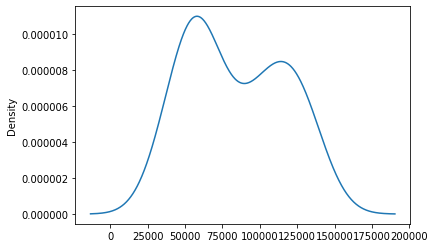

In [7]:
df.salary.plot.kde()

In [10]:
df.exp.mode()

0    3.2
1    4.0
dtype: float64

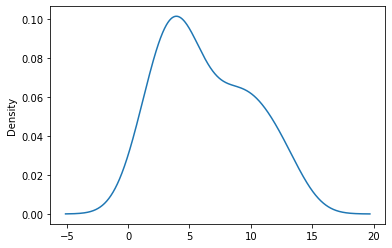

In [9]:
df.exp.plot.kde()

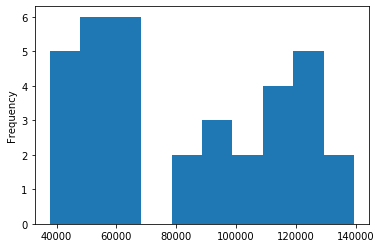

In [13]:
df.salary.plot.hist()

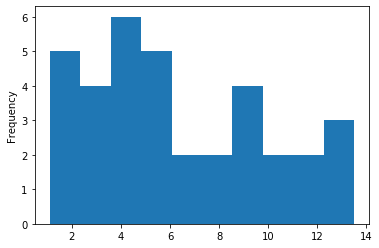

In [14]:
df['exp'].plot.hist()

In [16]:
q1 = df.exp.quantile(.25)
q3 = df.exp.quantile(.75)

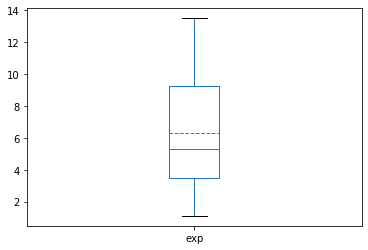

In [21]:
df.exp.plot.box(showmeans=True, meanline=True)

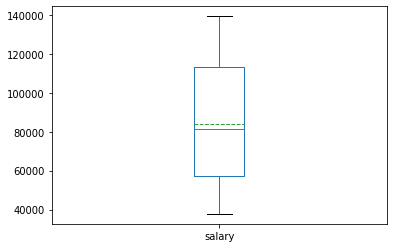

In [20]:
df.salary.plot.box(showmeans=True, meanline=True)

### Ages Examples

In [27]:
ages  = pd.Series([20,22,25,20,34,30,30,20,30,70])

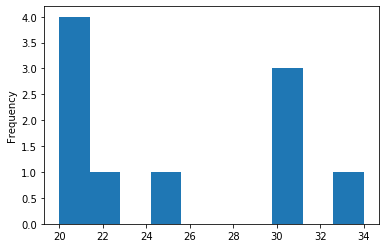

In [23]:
ages.plot.hist()

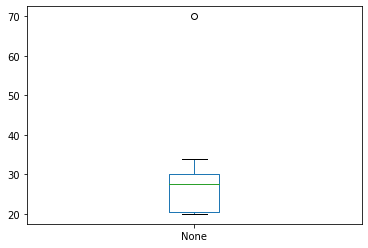

In [28]:
ages.plot.box()

## 25-MAY-2020

In [27]:
ss.skew(df['exp'])

0.4019376065648398

### Salaries

In [28]:
salaries = pd.Series([200000,300000, 20000000,300000,250000])
ages = pd.Series([20,25,30,40,24])

In [29]:
q1 = salaries.quantile(.25)
q3 = salaries.quantile(.75)
iqr = q3 - q1

In [30]:
# Upper outliers
for v in salaries:
    if v > (q3 + 1.5 * iqr):
        print(v)

20000000


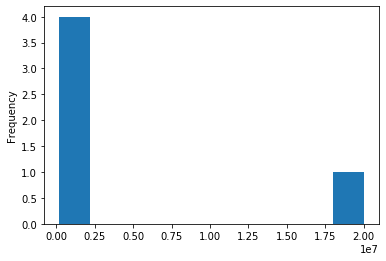

In [31]:
salaries.plot.hist()

In [32]:
ss.skew(salaries)

1.4999172216610963

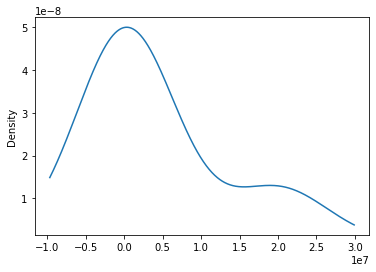

In [33]:
salaries.plot.kde()

### Kurtosis

In [89]:
marks = [50,50,50,50,50,200,200,200,200,200,200]

In [78]:
ss.kurtosis(marks)

2.3810131834699515

In [74]:
ss.kurtosis(marks, fisher=False)

4.386023143934186

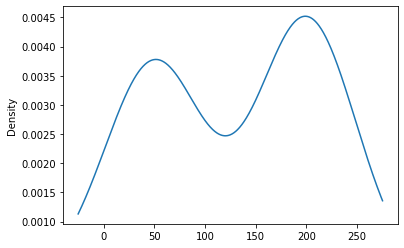

In [90]:
pd.Series(marks).plot.kde()

In [44]:
marks = [10,20,30,35,35,40,50,60]

In [37]:
s.mean(marks),s.median(marks), ss.mode(marks)

(35, 35.0, ModeResult(mode=array([35]), count=array([2])))

In [47]:
ss.kurtosis(marks), ss.kurtosis(marks,fisher=False)

(-0.6914285714285713, 2.3085714285714287)

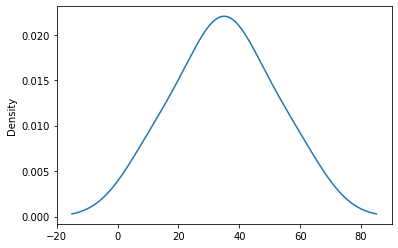

In [29]:
pd.Series(marks).plot.kde()

## Correlaton 

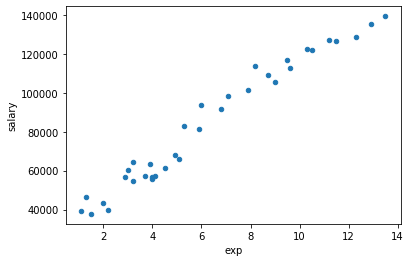

In [36]:
df.plot.scatter(x='exp',y='salary')

In [37]:
ss.pearsonr(df['exp'], df['salary'])

(0.9824272546479684, 1.230990588992688e-25)

In [38]:
salaries = pd.Series([200000,300000,500000,300000,250000])
ages = pd.Series([20,25,30,40,24])

In [39]:
persons =pd.DataFrame( {'salary': salaries, 'age' : ages})

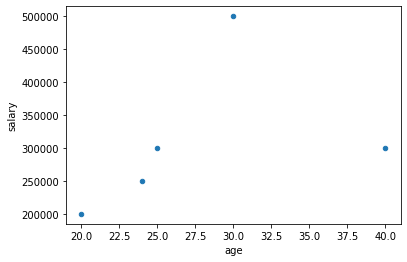

In [40]:
persons.plot.scatter(x = 'age', y = 'salary')

In [41]:
ss.pearsonr(persons['age'], persons['salary'])

(0.40181541321778125, 0.5025140084907671)

## Regression 

In [42]:
det = ss.linregress(df['exp'], df['salary'])

In [43]:
det

LinregressResult(slope=8731.941047062492, intercept=28859.526194531478, rvalue=0.9824272546479683, pvalue=1.2309905889928102e-25, stderr=288.78315746221443)

In [44]:
exp = 4.5
salary = det.intercept + det.slope * exp
print(exp, salary)

4.5 68153.26090631269
